# Library Import

In [84]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [85]:
# Importing Extra Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Normalizer
import tensorflow_datasets as tfds
import re
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet


import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('stopwords')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Steps outline**
1. Downloading data set by inputting student number.
2. Exploratory Data Analysis, Data Processing, Feature Extraction & Token Normalisation
3. Classification with Logistic Regression



# Step 1: Load Dataset


In [86]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
t_train = fetch_20newsgroups(subset='train',  categories=categories, shuffle=True, random_state=42)
t_test = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)

In [87]:
 index=input('type your student number?')

type your student number?27014467


In [88]:
x=divmod(int(index),4)
yourdata1=x[1]
y=divmod(int(index),3)
yourdata2=y[1]

print('This is your data set index ----> (', x[1], y[1], ')' )

This is your data set index ----> ( 3 1 )


In [89]:
data1= t_train.target_names[x[1]]
data2= t_train.target_names[y[1]]
categories_=[data1,data2]
print(categories_)

['soc.religion.christian', 'comp.graphics']


# Step 2: Exploratory Data Analysis


In [90]:
# Using the fetch_20newsgroups function a list of raw text data is obtained (dataset) 
# categories_ was used so only texts with target ['soc.religion.christian', 'comp.graphics'] are pulled
# The data were seperated into training and testing dataset. (Training = 60% , Test =40%)
t_train = fetch_20newsgroups(subset='train',  categories=categories_, shuffle=True, random_state=42)
t_test = fetch_20newsgroups(subset='test',  categories=categories_, shuffle=True, random_state=42)

In [91]:
# Visualising the target categories in dataset
t_train.target_names, t_train.target[:10] 

(['comp.graphics', 'soc.religion.christian'],
 array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0]))

In [92]:
# Printing names
for t in t_train.target[:10]:
  print(t_train.target_names[t])
# 1 = soc.religion.christian, 0 = comp.graphics

soc.religion.christian
comp.graphics
comp.graphics
soc.religion.christian
comp.graphics
comp.graphics
soc.religion.christian
comp.graphics
soc.religion.christian
comp.graphics


In [93]:
# Train data are converted to a dataframe
t_train_df_1 = pd.DataFrame(t_train.data)
t_train_df_1 
# A new column is added to the df called Target. This will column will only include 2 values: 0 & 1.
# 1 = soc.religion.christian, 0 = comp.graphics as observed before. 
t_train_df_1['Target'] = pd.Series(data=t_train.target)
# A new df is created to generate graphs.  
# Groupby using the Target column to get a count of newsletters per group
t_train_df = t_train_df_1.groupby(['Target']).agg(count=('Target', 'count')).reset_index()

In [94]:
# Repeat process for test data
t_test_df = pd.DataFrame(t_test.data)
t_test_df['Target'] = pd.Series(data=t_train.target)
t_test_df
t_test_df_1 = t_test_df.groupby(['Target']).agg(count=('Target', 'count')).reset_index()

In [95]:
# Generating a bar chart to view compare the two train dataframes. 
fig = px.bar(t_train_df, x='Target', y='count',color='Target')
fig.update_layout(title='Train Data Class Dispersion')
fig.show()
# It can be observed that the training datasets have similar letters in each 
# with soc.religion.christian category (1) slightly differentiating with only 15 more letters

In [96]:
# Generating a bar chart to view compare the two test dataframes. 
fig = px.bar(t_test_df_1, x='Target', y='count',color='Target')
fig.update_layout(title='Test Data Class Dispersion')
fig.show()
# Same observations apply

In [97]:
# Adding a new column to the df to store the sum of the strings for each text row in train df
t_train_df_1['String Count'] = t_train_df_1[0].str.len()

In [98]:
# printing the new dataframe and showing the new column
t_train_df_1

0  Target  String Count
0     From: mussack@austin.ibm.com (Christopher Muss...       1           570
1     From: greg@cs.uct.ac.za (Gregory Torrance)\nSu...       0           810
2     From: clldomps@cs.ruu.nl (Louis van Dompselaar...       0           785
3     From: jayne@mmalt.guild.org (Jayne Kulikauskas...       1          1322
4     From: jack@shograf.com (Jack Ritter)\nSubject:...       0           420
...                                                 ...     ...           ...
1178  From: ricky@watson.ibm.com (Rick Turner)\nSubj...       0           486
1179  From: stephen@mont.cs.missouri.edu (Stephen Mo...       1          3264
1180  From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...       1          1209
1181  From: hudson@athena.cs.uga.edu (Paul Hudson Jr...       1          3727
1182  From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AI...       0          1784

[1183 rows x 3 columns]

In [99]:
# Generating a histogram to show the count of characters of the target categories in the training dataset
fig = px.histogram(t_train_df_1, x="String Count", color ='Target')
fig.update_layout(title='Number of characters in Training Df')
fig.show()
# It can be seen that predominantly a text string will contain between 0 to 1499 characters

In [100]:
# Adding a new column to the df to store the sum of the strings for each text row in test df
t_test_df['String Count'] = t_test_df[0].str.len()
# printing the new df and showing the new column
t_test_df

0  Target  String Count
0    From: dan@ingres.com (a Rose arose)\nSubject: ...       1          3802
1    From: jenk@microsoft.com (Jen Kilmer)\nSubject...       0          1223
2    From: jenk@microsoft.com (Jen Kilmer)\nSubject...       0          1823
3    From: xepo@csd4.csd.uwm.edu (Scott R Violet)\n...       1           625
4    From: rak@crosfield.co.uk (Richard Kirk)\nSubj...       0           380
..                                                 ...     ...           ...
782  From: abig@netcom.com (Access Bus Industry Gp)...       0          4271
783  From: shellgate!llo@uu4.psi.com (Larry L. Over...       1          1055
784  From: Fil.Sapienza@med.umich.edu (Fil Sapienza...       0          1656
785  From: nagle@netcom.com (John Nagle)\nSubject: ...       0           824
786  From: ewinterr@cwis.isu.edu (EWING_TERRY)\nSub...       1           786

[787 rows x 3 columns]

In [101]:
# Histogram to show the count of characters for both of the targets in the test dataset
# We can see that predominantly a text string will contain between 0 to 1999 characters
fig = px.histogram(t_test_df, x="String Count", color ='Target')
fig.update_layout(title='Number of characters in Test Df')
fig.show()

In [102]:
# Creating a new column which will hold the count of words in each string
t_train_df_1['Word Count'] = t_train_df_1[0].str.split().map(lambda x: len(x))

In [103]:
# New Column
t_train_df_1

0  Target  String Count  \
0     From: mussack@austin.ibm.com (Christopher Muss...       1           570   
1     From: greg@cs.uct.ac.za (Gregory Torrance)\nSu...       0           810   
2     From: clldomps@cs.ruu.nl (Louis van Dompselaar...       0           785   
3     From: jayne@mmalt.guild.org (Jayne Kulikauskas...       1          1322   
4     From: jack@shograf.com (Jack Ritter)\nSubject:...       0           420   
...                                                 ...     ...           ...   
1178  From: ricky@watson.ibm.com (Rick Turner)\nSubj...       0           486   
1179  From: stephen@mont.cs.missouri.edu (Stephen Mo...       1          3264   
1180  From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...       1          1209   
1181  From: hudson@athena.cs.uga.edu (Paul Hudson Jr...       1          3727   
1182  From: wijkstra@fwi.uva.nl (Marcel Wijkstra (AI...       0          1784   

      Word Count  
0             89  
1            129  
2            129  
3            209  
4             46  
...          ...  
1178          71  
1179         553  
1180         177  
1181         633  
1182         298  

[1183 rows x 4 columns]

In [104]:
# Histogram to show the count of words for both of the targets in the training dataset
# We can see that predominantly a text string will contain between 0 to 199 words
fig = px.histogram(t_train_df_1, x="Word Count", color ='Target')
fig.update_layout(title='Number of words in Training Df')
fig.show()

In [105]:
# Creating a new column which will hold the count of words in each string for the test dataset
t_test_df['Word Count'] = t_test_df[0].str.split().map(lambda x: len(x))

In [106]:
t_test_df

0  Target  String Count  \
0    From: dan@ingres.com (a Rose arose)\nSubject: ...       1          3802   
1    From: jenk@microsoft.com (Jen Kilmer)\nSubject...       0          1223   
2    From: jenk@microsoft.com (Jen Kilmer)\nSubject...       0          1823   
3    From: xepo@csd4.csd.uwm.edu (Scott R Violet)\n...       1           625   
4    From: rak@crosfield.co.uk (Richard Kirk)\nSubj...       0           380   
..                                                 ...     ...           ...   
782  From: abig@netcom.com (Access Bus Industry Gp)...       0          4271   
783  From: shellgate!llo@uu4.psi.com (Larry L. Over...       1          1055   
784  From: Fil.Sapienza@med.umich.edu (Fil Sapienza...       0          1656   
785  From: nagle@netcom.com (John Nagle)\nSubject: ...       0           824   
786  From: ewinterr@cwis.isu.edu (EWING_TERRY)\nSub...       1           786   

     Word Count  
0           664  
1           188  
2           293  
3            93  
4            49  
..          ...  
782         578  
783         149  
784         237  
785         153  
786         135  

[787 rows x 4 columns]

In [107]:
# Histogram to show the count of words for both of the targets in the test dataset
# We can see that predominantly a text string will contain between 0 to 199 words
fig = px.histogram(t_test_df, x="Word Count", color ='Target')
fig.update_layout(title='Number of words in Test Df')
fig.show()

In [108]:
def create_corpus(target):
    corpus=[]
    
    for x in t_test_df[t_test_df['Target']==target ][0].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [109]:
# The following code uses the stopword library which will print out all the words in the english language that don't add further meaning to a sentence.
stop = stopwords.words('english')
np.array(stop)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [110]:
# This code outputs the most common stopwords in the data set
comment_words = '' 
stopwords = set(STOPWORDS) 
  

for val in stop: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Convert each token into lowercase letter
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


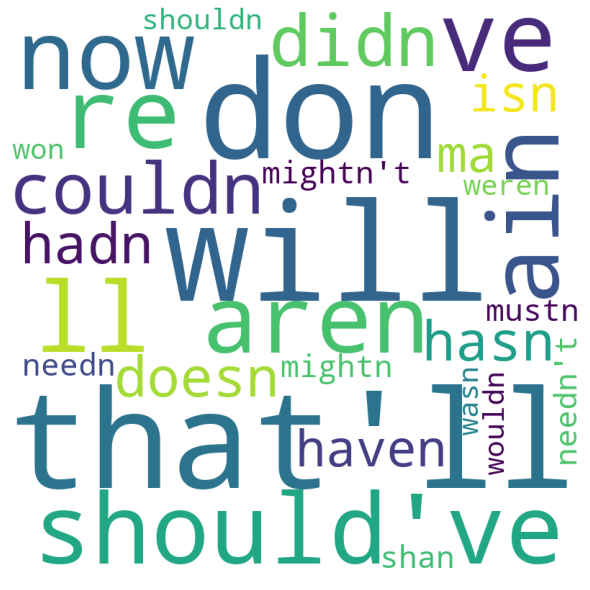

In [111]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [112]:
# This code creates a disctionary to show all the stop words in the data set and the number of times they appear for comp.graphics category.
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1  

In [113]:
# Converting the dictionary created above into a dataframe to see the top 15 most common stopwords in the training dataset for comp.graphics category.

a = pd.DataFrame(dic.items())
a = a.sort_values(by=1, ascending=False)
a = a.head(15)

fig = px.bar(a, x=0, y=1,color=0)
fig.update_layout(title='Most Common Stop Words in comp.graphics Training Data')
fig.show()

In [114]:
# This code creates a dictionary to show all the stop words in the data set and the number of times they appear for soc.religion.christian category.

corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1   

In [115]:
# Converting the dictionary created above into a dataframe to see the top 15 most common stopwords in the training dataset for soc.religion.christian category.
a = pd.DataFrame(dic.items())
a = a.sort_values(by=1, ascending=False)
a = a.head(15)

fig = px.bar(a, x=0, y=1,color=0)
fig.update_layout(title='Most Common Stop Words in soc.religion.christian Training Data')
fig.show()

In [116]:
# We then convert the dictionary containing all the punctuations 
# and the count of time they appear in our dataset 
# for comp_graphics category.

plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
a = pd.DataFrame(dic.items())
a = a.sort_values(by=1, ascending=False)

fig = px.bar(a, x=0, y=1,color=0)
fig.update_layout(title='Training Data Punctuation Occurrences for the comp.graphics Category')
fig.show()

<Figure size 720x360 with 0 Axes>

In [117]:
# We then convert the dictionary containing all the punctuations 
# and the count of time they appear in our dataset 
# for soc.religion.christian category.

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
a = pd.DataFrame(dic.items())
a = a.sort_values(by=1, ascending=False)

fig = px.bar(a, x=0, y=1,color=0)
fig.update_layout(title='Training Data Punctuation Occurrences for the soc.religion.christian Category')
fig.show()

<Figure size 720x360 with 0 Axes>

# Step 3: Text Data Processing & Feature Extraction

In [118]:
# creating two datasets where one will hold train data 60% 
# and the other will hold test data 40%.

data_train = fetch_20newsgroups(subset='train', 
                                categories=categories_, 
                                shuffle=True, random_state=42)



data_test = fetch_20newsgroups(subset='test', 
                               categories=categories_, 
                               shuffle=True, random_state=42)

In [119]:
# Spling the train and test datasets into the actual data and targeted data
X_train = data_train.data
y_train = data_train.target

X_test = data_test.data
y_test = data_test.target

In [120]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [121]:
stemmer = nltk.stem.PorterStemmer()
ps = PorterStemmer()
# Remove unwanted characters, 
# and format the text to create fewer null word embeddings
def clean_text(text, remove_stopwords = True):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
            
    return text

In [122]:
# We add the target column into our training dataset
X_train = pd.DataFrame(data_train.data)
X_train['Target'] = pd.Series(data=data_train.target)
# We add the target column into our test dataset
X_test = pd.DataFrame(data_test.data)
X_test['Target'] = pd.Series(data=data_test.target)

In [123]:
# We conver our dataset from a string to a dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [124]:
# We check to see if the lenght in our datasets are even
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

In [125]:
# combining the train and test data to remove all unwanted data from our text
full_data = X_train.append(X_test, ignore_index=True)

In [126]:
# applying the clean text on our dataset
full_data['text'] = full_data[0].apply(lambda x: clean_text(x))

In [127]:
# Removing stopwords belonging to english language
from nltk.corpus import stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [128]:
# applying the remove_stopwords function to our dataset 
# and creating a new column called no_stop_words
full_data['no_stop_words'] = full_data['text'].apply(lambda x: remove_stopwords(x))

# Step 4: Token Normalisation (Stemming & Lemmatizing the data)

In [129]:
# removing and replacing suffixes to get to the root form of the word,
# which is called the stem for instance cats - cat, wolves - wolv
def stemmer_text_func(text):
    stemmer = nltk.stem.PorterStemmer()
    full_data['stemming_text'] = list(map(lambda word:
                                     list(map(stemmer.stem, word)),
                                     full_data.no_stop_words))
    

stemmer_text_func(full_data.no_stop_words)

In [130]:
# removing and replacing suffixes to get to the root form of the word,
# which is called the stem for instance cats - cat, wolves - wolv
def lemmatizer_text_func(text):
    lemmatizer=nltk.stem.WordNetLemmatizer()
    full_data['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemmatizer.lemmatize, word)),
                                     full_data.no_stop_words))
    

lemmatizer_text_func(full_data.no_stop_words)

In [131]:
# creating a new dataframe which will only hold the lemmatized text and the target column
full_data_lemmatized_text = full_data[['lemmatized_text','Target']].copy()

In [132]:
# creating a new dataframe which will only hold the stemming text and the target column
full_data_stemming_text = full_data[['stemming_text','Target']].copy()

## Step 4.1: Bag-of-Words Model

In [133]:
from sklearn.model_selection import train_test_split
# In the following section I will apply the logistic regression on the stemming and lemmatized data set

# Seperating the stemming dataset into training and testing data
st_training_data, st_test_data = train_test_split(full_data_stemming_text, train_size = 0.6, random_state=42)
# Seperating the lemmatized dataset into training and testing data
le_training_data, le_test_data = train_test_split(full_data_stemming_text, train_size = 0.6, random_state=42)

In [134]:
# Spliting the train and test datasets into the actual data and targeted data
# for the stemming dataset
st_X_train = st_training_data['stemming_text']
st_y_train = st_training_data['Target']

st_X_test = st_test_data['stemming_text']
st_y_test = st_test_data['Target']


# Spliting the train and test datasets into the actual data and targeted data
# for the lemmatized dataset
le_X_train = le_training_data['stemming_text']
le_y_train = le_training_data['Target']

le_X_test = le_test_data['stemming_text']
le_y_test = le_test_data['Target']

In [135]:
print('Test and training data for stemming dataset')
print(st_X_train.shape,st_y_train.shape)
print(st_X_test.shape,st_y_test.shape)

print('Test and training data for lemmatized dataset')
print(le_X_train.shape,le_y_train.shape)
print(le_X_test.shape,le_y_test.shape)

Test and training data for stemming dataset
(1182,) (1182,)
(788,) (788,)
Test and training data for lemmatized dataset
(1182,) (1182,)
(788,) (788,)


In [136]:
# Countvectorizer converts a collection of text documents to a matrix of token counts. 
# It is important to note here that CountVectorizer comes with a lot of options to automatically do preprocessing, 
# tokenization, and stop word removal.However, i did all the process manually above to just get a better understanding. 
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 

In [137]:
# Appliying the BOW function to our training dataset.
# For both lemmatize and stemming dataset
st_X_tr_bow = bow_transform.fit_transform(st_X_train)
le_X_tr_bow = bow_transform.fit_transform(le_X_train)

In [138]:
len(bow_transform.vocabulary_)

196416

In [139]:
print(st_X_tr_bow.shape)
print(le_X_tr_bow.shape)

(1182, 196416)
(1182, 196416)


In [140]:
# Appliying the BOW function to our testing dataset.
# For both lemmatize and stemming dataset
st_X_te_bow = bow_transform.transform(st_X_test)
le_X_te_bow = bow_transform.transform(le_X_test)

In [141]:
st_y_tr = st_y_train
st_y_te = st_y_test

In [142]:
le_y_tr = le_y_train
le_y_te = le_y_test

## Step 4.2: TF-Idf Model

In [143]:
#TFIDF Features
#A problem with the Bag of Words approach is that highly frequent 
#words start to dominate in the document (e.g. larger score), 
#but may not contain as much “informational content”. 
#Also, it will give more weight to longer documents than shorter documents.
#One approach is to rescale the frequency of words by how often they appear 
#in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called Term Frequency-Inverse Document Frequency, or TF-IDF for short, where:

tfidf_transform = TfidfTransformer(norm=None)
# Appliying TF-idf function to our training 
# dataset after appliying the BOW function.
st_X_tr_tfidf = tfidf_transform.fit_transform(st_X_tr_bow)
le_X_tr_tfidf = tfidf_transform.fit_transform(le_X_tr_bow)

In [144]:
# Appliying TF-idf function to our testing 
# dataset after appliying the BOW function.
st_X_te_tfidf = tfidf_transform.transform(st_X_te_bow)
le_X_te_tfidf = tfidf_transform.transform(le_X_te_bow)

# Step 5: Classification with Logistic Regression

## Stemmers Data Classification

In [145]:
from sklearn.metrics import plot_confusion_matrix
# Creating a function which will run the LogisticRegression model 
# on our dataset. It will output our accuracy score for our data.
def log_regr_class(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression().fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    plot_confusion_matrix(model, X_test, y_test)  
    return model

Test Score with bow features 0.9251269035532995


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Test Score with tf-idf features 0.9213197969543148


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



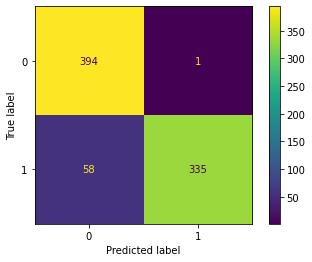

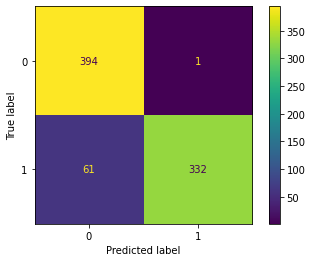

In [146]:
# Gives us the accuarcy score for our BOW model
model_bow = log_regr_class(st_X_tr_bow, st_y_tr, st_X_te_bow, st_y_te, 'bow')
# Gives us the accuarcy score for our TF-IDF model
model_tfidf = log_regr_class(st_X_tr_tfidf, st_y_tr, st_X_te_tfidf, st_y_te, 'tf-idf')

### Step 5.1: Stemmers Data Prediction

In [160]:
# We will use the predicted value to see how 
# accuare our model is when using the test data.
st_predicted = model_bow.predict(st_X_te_bow)

### Step 5.2: Stemmers Data Evaluation

In [161]:
from sklearn import metrics
# Using metrics.accuarecy_score to see how 
# accuare our model is compared to the predicted data for the BoW stemmers data.
print("Accuracy:", metrics.accuracy_score(st_y_te, st_predicted))
print(metrics.classification_report(st_y_te, st_predicted, target_names=categories_))

Accuracy: 0.9251269035532995
                        precision    recall  f1-score   support

soc.religion.christian       0.87      1.00      0.93       395
         comp.graphics       1.00      0.85      0.92       393

              accuracy                           0.93       788
             macro avg       0.93      0.92      0.92       788
          weighted avg       0.93      0.93      0.92       788



In [162]:
# Creating a confusion matrix showing us how well each target is being predicted
pd.DataFrame(metrics.confusion_matrix(st_y_te, st_predicted),
             columns=categories_)

soc.religion.christian  comp.graphics
0                     394              1
1                      58            335

## Lemmatizer Data Classification

Test Score with bow features 0.9251269035532995


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Test Score with tf-idf features 0.9213197969543148


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



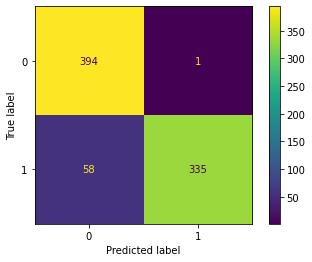

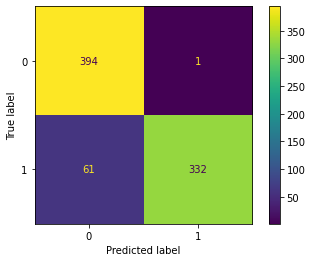

In [150]:
model_bow = log_regr_class(le_X_tr_bow, le_y_tr, le_X_te_bow, le_y_te, 'bow')
model_tfidf = log_regr_class(le_X_tr_tfidf, le_y_tr, le_X_te_tfidf, le_y_te, 'tf-idf')

### Step 5.3: Lemmatizer Data Prediction

In [163]:
le_predicted = model_bow.predict(le_X_te_bow)

### Step 5.4: Lemmatizer Data Evaluation 

In [164]:
# Using metrics.accuarecy_score to see how 
# accurate our model is compared to the predicted data for the BoW lemmatizer
print("Accuracy:", metrics.accuracy_score(le_y_te, le_predicted))

print(metrics.classification_report(le_y_te, le_predicted, target_names=categories_))

Accuracy: 0.9251269035532995
                        precision    recall  f1-score   support

soc.religion.christian       0.87      1.00      0.93       395
         comp.graphics       1.00      0.85      0.92       393

              accuracy                           0.93       788
             macro avg       0.93      0.92      0.92       788
          weighted avg       0.93      0.93      0.92       788



In [165]:
# Creating a confusion matrix showing us how well each target is being predicted
pd.DataFrame(metrics.confusion_matrix(le_y_te, le_predicted),
             columns=categories_)

soc.religion.christian  comp.graphics
0                     394              1
1                      58            335